# Case study on Supervised learning

Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris
species.(also do random forest algorithm)

In [1]:
#importing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### 1. Read the dataset to the python environment

In [2]:
data = pd.read_excel("C:/Users/Admin/Downloads/iris.xls")
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.shape

(150, 5)

### 2.Do necessary pre-processing steps.

In [6]:
#identifying and handling the missing values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

Null values present in three columns: SL,SW and PL

In [7]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

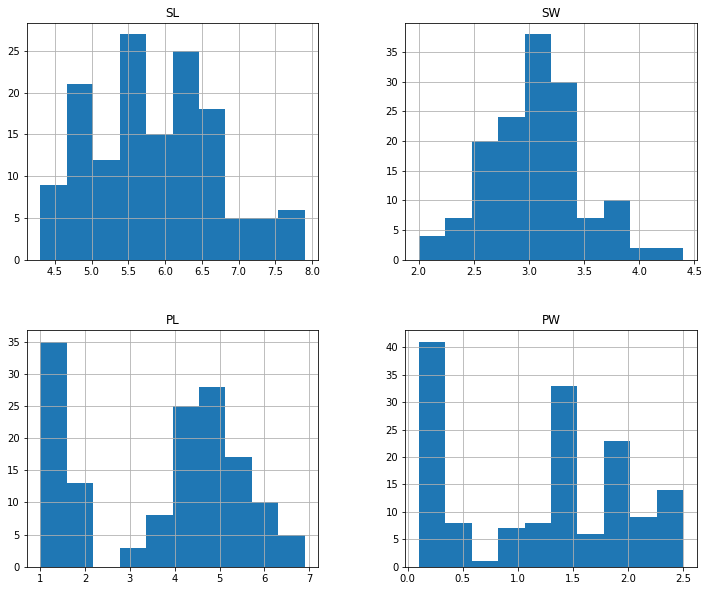

In [8]:
freqgraph = data.select_dtypes(include=['float','int64'])
freqgraph.hist(figsize=(12,10))
plt.show()

In [9]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [12]:
## Filling Null values
data['SL']=data['SL'].fillna(data['SL'].median())
data['SW']=data['SW'].fillna(data['SW'].mean())
data['PL']=data['PL'].fillna(data['PL'].median())

In [13]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

<AxesSubplot:>

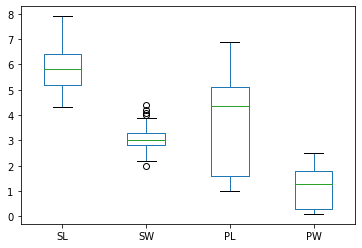

In [14]:
# plotting boxplot of the entire dataset
data.plot(kind='box')

From the boxplot the outliers are clearly visible in SW

In [15]:
Q1 = np.percentile(data['SW'],25,interpolation='midpoint')
Q3 = np.percentile(data['SW'],75,interpolation='midpoint')

IQR = Q3-Q1
low_limit=Q1-1.5*IQR
high_limit=Q3+1.5*IQR

index=data['SW'][(data['SW']<low_limit)|(data['SW']>high_limit)].index
data.drop(index,inplace=True)

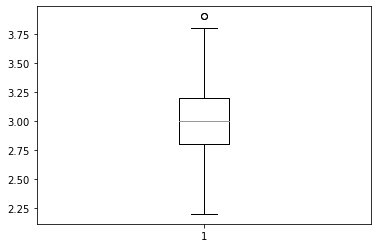

In [16]:
plt.boxplot(data['SW'])
plt.show() 

### 3.Find out which classification model gives the best result to predict iris species.(also do random forest algorithm). 

In [17]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
y = data['Classification']
X = data.drop(['Classification'], axis = 1)

In [24]:
#splitting of the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, random_state=42,test_size=0.25)

### i) Logisitic Regression

In [25]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [26]:
y_test[0:5]

74     Iris-versicolor
145     Iris-virginica
29         Iris-setosa
21         Iris-setosa
46         Iris-setosa
Name: Classification, dtype: object

In [27]:
y_pred[0:5]

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.8918918918918919
precision is : 0.8834498834498835
recall is : 0.8915343915343915
F1 score is : 0.8839506172839506


In [29]:
temp=[]
temp.append(['Logistic Regression',round(f1_score(y_test,y_pred,average='macro'),5)])

### ii) KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
acc_val=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_val.append(acc)

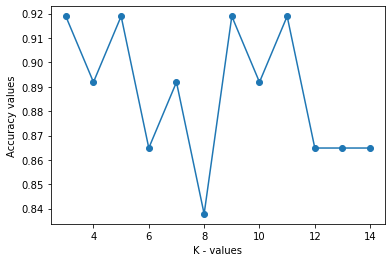

In [31]:
plt.plot(neighbors,acc_val,'o-')
plt.xlabel('K - values')
plt.ylabel('Accuracy values')
plt.show()

In [32]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [33]:
y_pred[0:5]

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [34]:
y_test[0:5]

74     Iris-versicolor
145     Iris-virginica
29         Iris-setosa
21         Iris-setosa
46         Iris-setosa
Name: Classification, dtype: object

In [35]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.918918918918919
precision is : 0.9095238095238095
recall is : 0.9153439153439153
F1 score is : 0.9112132182307621


In [36]:
temp.append(['KNN',round(f1_score(y_test,y_pred,average='macro'),5)])

### iii) Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)

In [38]:
y_pred[0:5]

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [39]:
y_test[0:5]

74     Iris-versicolor
145     Iris-virginica
29         Iris-setosa
21         Iris-setosa
46         Iris-setosa
Name: Classification, dtype: object

In [40]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.918918918918919
precision is : 0.9076923076923077
recall is : 0.9153439153439153
F1 score is : 0.9103313840155945


In [41]:
temp.append(['DecisionTree',round(f1_score(y_test,y_pred,average='macro'),5)])

### iv) Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
rm=RandomForestClassifier()
rm.fit(X_train,y_train)
y_pred=rm.predict(X_test)

In [43]:
y_pred[0:5]

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [44]:
y_test[0:5]

74     Iris-versicolor
145     Iris-virginica
29         Iris-setosa
21         Iris-setosa
46         Iris-setosa
Name: Classification, dtype: object

In [45]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.9459459459459459
precision is : 0.9391534391534391
recall is : 0.9391534391534391
F1 score is : 0.9391534391534391


In [46]:
temp.append(['Random Forest',round(f1_score(y_test,y_pred,average='macro'),5)])

### v) SVM
#### a. Linear SVM

In [47]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
y_pred=svm_linear.predict(X_test)


In [48]:
y_pred[0:5]

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [49]:
y_test[0:5]

74     Iris-versicolor
145     Iris-virginica
29         Iris-setosa
21         Iris-setosa
46         Iris-setosa
Name: Classification, dtype: object

In [50]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.918918918918919
precision is : 0.9076923076923077
recall is : 0.9153439153439153
F1 score is : 0.9103313840155945


In [51]:
temp.append(['Linear SVM',round(f1_score(y_test,y_pred,average='macro'),5)])

#### b.Polynomial SVM

In [52]:
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(X_train,y_train)
y_pred=svm_poly.predict(X_test)

In [53]:
y_pred[0:5]

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [54]:
y_test[0:5]

74     Iris-versicolor
145     Iris-virginica
29         Iris-setosa
21         Iris-setosa
46         Iris-setosa
Name: Classification, dtype: object

In [55]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.918918918918919
precision is : 0.9095238095238095
recall is : 0.9153439153439153
F1 score is : 0.9112132182307621


In [56]:
temp.append(['Polynomial SVM',round(f1_score(y_test,y_pred,average='macro'),5)])

#### c.Radial SVM

In [57]:
svm_radial=SVC(kernel='rbf')
svm_radial.fit(X_train,y_train)
y_pred=svm_radial.predict(X_test)

In [58]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.8648648648648649
precision is : 0.861111111111111
recall is : 0.8677248677248678
F1 score is : 0.8570071903405238


In [59]:
temp.append(['Radial SVM',round(f1_score(y_test,y_pred,average='macro'),5)])

In [60]:
## converting all f1 score to a dataframe
data = pd.DataFrame(temp, columns = ['Algorithms', 'F1-Score'])

In [61]:
data

,Algorithms,F1-Score
0,Logistic Regression,0.88395
1,KNN,0.91121
2,DecisionTree,0.91033
3,Random Forest,0.93915
4,Linear SVM,0.91033
5,Polynomial SVM,0.91121
6,Radial SVM,0.85701


## Random Forest has highest F1 score (0.93915) than other algorithms.